Plot the dependency between two similarity metrics

<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h2>Calculate and plot dependency between two similarity metrics</h2>
Here: Pearson's Correlation vs Mutual Information

In [4]:
print(plots.plot_similarity_dependency.__doc__)


    Calculate and plot dependency between two similarity metrics

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metric1 (function): First similarity metric to compute similarity between two time series
        metric2 (function): Second similarity metric to compute similarity between two time series
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


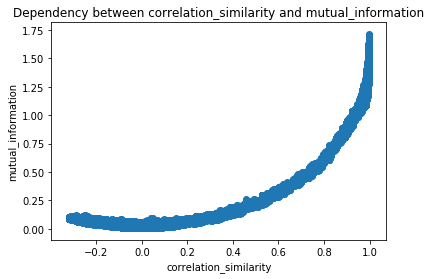

In [5]:
plots.plot_similarity_dependency(u_l30, qbo_equator, sim.correlation_similarity, sim.mutual_information)